## Question 1

*   Import the data.

*   Also generate approximately 100 equally spaced x data points over the range of 0 to 1. Using these points, calculate the y-data which represents the "ground truth" (the real function) from the equation: $y = sin(2\pi x)$

*   Plot the sparse data (`x` vs `y`) and the calculated ("real") data.


In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/X_Y_Sinusoid_Data.csv")
data.head()



,x,y
0,0.038571,0.066391
1,0.166776,1.027483
2,0.183153,1.245302
3,0.187359,1.004781
4,0.243116,1.264121


In [212]:
X_real = np.linspace(0, 1.0, 100)
Y_real = np.sin(2 * np.pi * X_real)
X_real

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

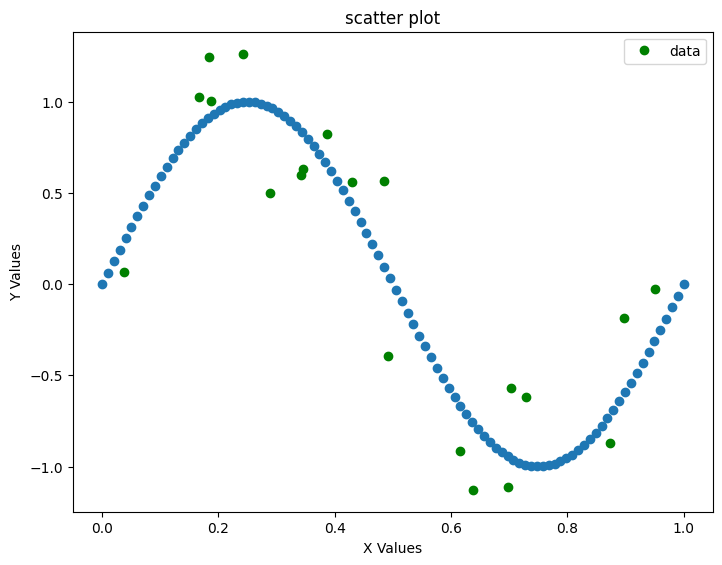

In [213]:
fig=plt.figure()
ax_1=fig.add_axes([0,0,1,1])

ax = data.set_index('x')['y'].plot(ls='', marker='o', label='data', color="g")
ax_1.scatter(X_real, Y_real, )

ax_1.set_xlabel('X Values')
ax_1.set_ylabel('Y Values')
ax_1.set_title('scatter plot')

ax_1.legend()
plt.show()


## Question 2

*   Using the `PolynomialFeatures` class from Scikit-learn's preprocessing library, create 20th order polynomial features.
*   Fit this data using linear regression.
*   Plot the resulting predicted value compared to the calculated data.

Note that `PolynomialFeatures` requires either a dataframe (with one column, not a Series) or a 2D array of dimension (`X`, 1), where `X` is the length.


In [214]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


poly = PolynomialFeatures(degree = 20)

X= data[["x"]]
y = data["y"]

X_poly = poly.fit_transform(X)

lr = LinearRegression()
lr.fit(X_poly,y)
predictions= lr.predict(X_poly)



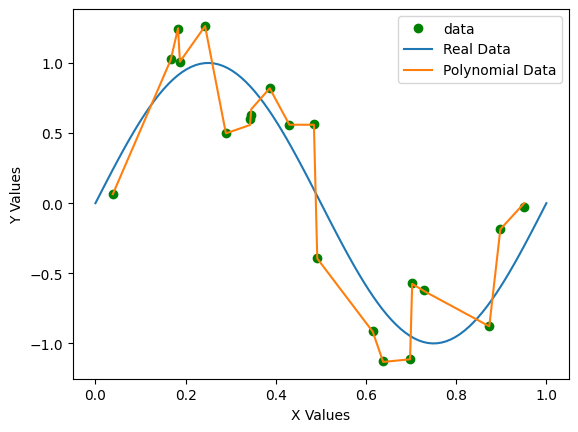

In [215]:
ax_3 = data.set_index('x')['y'].plot(ls='', marker='o', label='data', color="g")
plt.plot(X_real, Y_real, label='Real Data', alpha=1 )
plt.plot(X, predictions, label='Polynomial Data')
ax_3.set_xlabel('X Values')
ax_3.set_ylabel('Y Values')
ax_1.set_title('scatter plot')

ax_3.legend()
plt.show()

## Question 3

*   Perform the regression on using the data with polynomial features using ridge regression ($\alpha$=0.001) and lasso regression ($\alpha$=0.0001).
*   Plot the results, as was done in Question 1.
*   Also plot the magnitude of the coefficients obtained from these regressions, and compare them to those obtained from linear regression in the previous question. The linear regression coefficients will likely need a separate plot (or their own y-axis) due to their large magnitude.

What does the comparatively large magnitude of the data tell you about the role of regularization?


In [216]:
from sklearn.linear_model import Ridge, Lasso

ridge = Ridge(alpha = 0.001)
lasso = Lasso(alpha = 0.0001)

ridge_pred = ridge.fit(X_poly,y).predict(X_poly)
lasso_pred = lasso.fit(X_poly,y).predict(X_poly)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.470e-01, tolerance: 1.223e-03
  model = cd_fast.enet_coordinate_descent(


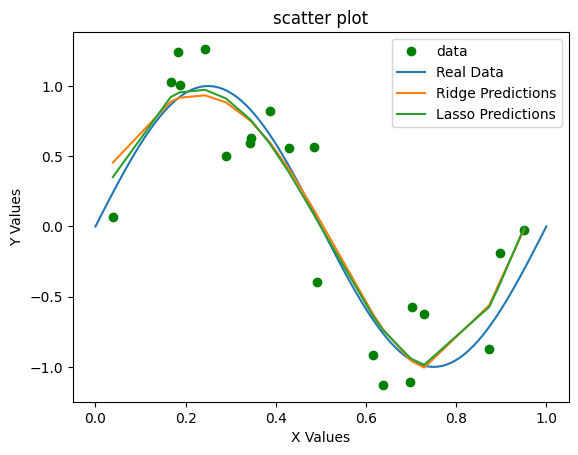

In [217]:
ax_4 = data.set_index('x')['y'].plot(ls='', marker='o', label='data', color="g")
plt.plot(X_real, Y_real, label='Real Data', alpha=1 )
plt.plot(X, ridge_pred, label='Ridge Predictions')
plt.plot(X, lasso_pred, label='Lasso Predictions')

ax_4.set_xlabel('X Values')
ax_4.set_ylabel('Y Values')
ax_4.set_title('scatter plot')

ax_4.legend()
plt.show()

In [218]:
coefficients = pd.DataFrame()
coefficients['linear regression'] = lr.coef_.ravel()
coefficients['ridge regression'] = ridge.coef_.ravel()
coefficients['lasso regression'] = lasso.coef_.ravel()
coefficients = coefficients.applymap(abs)

coefficients.describe()  # Huge difference in scale between non-regularized vs regularized regression

,linear regression,ridge regression,lasso regression
count,2.100000e+01,21.000000,21.000000
mean,5.786341e+13,2.169397,2.167284
std,6.005692e+13,2.900278,4.706731
min,1.613907e+07,0.000000,0.000000
25%,3.407774e+12,0.467578,0.000000
50%,3.625543e+13,1.017272,0.252181
75%,1.068105e+14,2.883507,1.641353
max,1.650270e+14,12.429635,20.176708


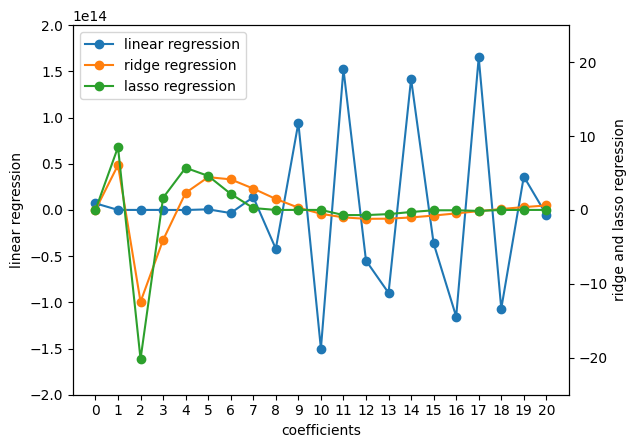

In [219]:
import seaborn as sns
colors = sns.color_palette()

# Setup the dual y-axes
ax1 = plt.axes()
ax2 = ax1.twinx()

# Plot the linear regression data
ax1.plot(lr.coef_.ravel(),
         color=colors[0], marker='o', label='linear regression')

# Plot the regularization data sets
ax2.plot(ridge.coef_.ravel(),
         color=colors[1], marker='o', label='ridge regression')

ax2.plot(lasso.coef_.ravel(),
         color=colors[2], marker='o', label='lasso regression')

# Customize axes scales
ax1.set_ylim(-2e14, 2e14)
ax2.set_ylim(-25, 25)

# Combine the legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2)

ax1.set(xlabel='coefficients',ylabel='linear regression')
ax2.set(ylabel='ridge and lasso regression')

ax1.set_xticks(range(len(lr.coef_)));


## Question 4

For the remaining questions, we will be working with the [data set](https://www.kaggle.com/c/house-prices-advanced-regression-techniques?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML240ENSkillsNetwork34171862-2022-01-01) from last lesson, which is based on housing prices in Ames, Iowa. There are an extensive number of features--see the exercises from week three for a discussion of these features.

To begin:

*   Import the data with Pandas, remove any null values, and one hot encode categoricals. Either Scikit-learn's feature encoders or Pandas `get_dummies` method can be used.
*   Split the data into train and test sets.
*   Log transform skewed features.
*   Scaling can be attempted, although it can be interesting to see how well regularization works without scaling features.


In [220]:
house_data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/Ames_Housing_Sales.csv")
house_data.head(10)

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,SalePrice
0,856.0,854.0,0.0,None,3,1Fam,TA,No,706.0,0.0,...,0.0,Pave,8,856.0,AllPub,0.0,2003,2003,2008,208500.0
1,1262.0,0.0,0.0,None,3,1Fam,TA,Gd,978.0,0.0,...,0.0,Pave,6,1262.0,AllPub,298.0,1976,1976,2007,181500.0
2,920.0,866.0,0.0,None,3,1Fam,TA,Mn,486.0,0.0,...,0.0,Pave,6,920.0,AllPub,0.0,2001,2002,2008,223500.0
3,961.0,756.0,0.0,None,3,1Fam,Gd,No,216.0,0.0,...,0.0,Pave,7,756.0,AllPub,0.0,1915,1970,2006,140000.0
4,1145.0,1053.0,0.0,None,4,1Fam,TA,Av,655.0,0.0,...,0.0,Pave,9,1145.0,AllPub,192.0,2000,2000,2008,250000.0
5,796.0,566.0,320.0,None,1,1Fam,TA,No,732.0,0.0,...,0.0,Pave,5,796.0,AllPub,40.0,1993,1995,2009,143000.0
6,1694.0,0.0,0.0,None,3,1Fam,TA,Av,1369.0,0.0,...,0.0,Pave,7,1686.0,AllPub,255.0,2004,2005,2007,307000.0
7,1107.0,983.0,0.0,None,3,1Fam,TA,Mn,859.0,32.0,...,0.0,Pave,7,1107.0,AllPub,235.0,1973,1973,2009,200000.0
8,1022.0,752.0,0.0,None,2,1Fam,None,None,0.0,0.0,...,0.0,Pave,8,952.0,AllPub,90.0,1931,1950,2008,129900.0
9,1077.0,0.0,0.0,None,2,2fmCon,TA,No,851.0,0.0,...,0.0,Pave,5,991.0,AllPub,0.0,1939,1950,2008,118000.0


In [221]:
categories = house_data.select_dtypes(exclude = "number")
numbers = house_data.select_dtypes(include = "number")
categories_encoded = pd.get_dummies(categories)

In [222]:
numbers.describe()

house_data_enc = pd.concat([numbers,categories_encoded], axis=1, join='inner')
house_data_enc.head()
len(numbers.columns) + len(categories_encoded.columns)

295

In [223]:
from sklearn.preprocessing import PowerTransformer

yeojohnTr = PowerTransformer(standardize=True)




In [224]:
skew_limit = 0.75
skew_vals = house_data_enc[house_data_enc.columns].skew()

skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {0}'.format(skew_limit)))

skew_cols

,Skew
RoofMatl_Membran,37.134889
Heating_OthW,37.134889
MiscFeature_Othr,37.134889
SaleCondition_AdjLand,37.134889
HeatingQC_Po,37.134889
...,...
RoofMatl_CompShg,-7.231334
Condition2_Norm,-9.783580
PoolQC_None,-13.943743
Street_Pave,-16.534759


In [225]:
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    house_data_enc[col] == np.log1p(house_data_enc[col])

In [226]:
house_data_enc.skew()

1stFlrSF             1.390283
2ndFlrSF             0.786109
3SsnPorch           10.007116
BedroomAbvGr        -0.011947
BsmtFinSF1           1.678351
                      ...    
SaleType_WD         -2.149196
Street_Grvl         16.534759
Street_Pave        -16.534759
Utilities_AllPub   -37.134889
Utilities_NoSeWa    37.134889
Length: 295, dtype: float64

In [227]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming you have the 'normal_house_data_enc' DataFrame

# Get the column names of the DataFrame
columns_to_scale = normal_house_data_enc.columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform all columns of the DataFrame
scaled_data = scaler.fit_transform(normal_house_data_enc)

# Create a new DataFrame with scaled data and original column names
scaled_dataframe = pd.DataFrame(scaled_data, columns=columns_to_scale)



In [228]:
from sklearn.model_selection import train_test_split

X= house_data_enc.drop("SalePrice",axis="columns")
y = house_data_enc["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .7)

In [229]:
X_train.shape

(965, 294)

## Question 5

*   Write a function **`rmse`** that takes in truth and prediction values and returns the root-mean-squared error. Use sklearn's `mean_squared_error`.


In [230]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

def rmse(actual, predicted):
    return mean_squared_error(actual,predicted)


predictions = LinearRegression().fit(X_train,y_train).predict(X_test)
print(rmse(y_test,predictions))

5.7641656806961626e+17


## Question 6

Ridge regression uses L2 normalization to reduce the magnitude of the coefficients. This can be helpful in situations where there is high variance. The regularization functions in Scikit-learn each contain versions that have cross-validation built in.

*   Fit a regular (non-cross validated) Ridge model to a range of $\alpha$ values and plot the RMSE using the cross validated error function you created above.
*   Use $$\[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]$$ as the range of alphas.
*   Then repeat the fitting of the Ridge models using the range of $\alpha$ values from the prior section. Compare the results.


In [231]:
from sklearn.linear_model import Ridge, RidgeCV

ridge = Ridge()
ridge_cv = RidgeCV()
alphas = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80]
ridge_predictions = ridge.fit(X_train,y_train).predict(X_test)
ridge_cv_predictions = ridge_cv.fit(X_train,y_train).predict(X_test)


In [232]:
len(ridge_predictions)
print(rmse(y_test,ridge_predictions))
print(rmse(y_test,ridge_cv_predictions))

875903460.4777826
722171920.5522885


In [233]:
ridge_scores = []
ridge_cv_scores = []
ridge_cv = RidgeCV(alphas = alphas)
ridge_cv.fit(X_train,y_train)
ridge_cv_predictions = ridge_cv.predict(X_test)



In [234]:
print(rmse(y_test,ridge_cv_predictions))
print(ridge_cv.alpha_)

725268628.6413038
15.0


## Question 7

Much like the `RidgeCV` function, there is also a `LassoCV` function that uses an L1 regularization function and cross-validation. L1 regularization will selectively shrink some coefficients, effectively performing feature elimination.

The `LassoCV` function does not allow the scoring function to be set. However, the custom error function (`rmse`) created above can be used to evaluate the error on the final model.

Similarly, there is also an elastic net function with cross validation, `ElasticNetCV`, which is a combination of L2 and L1 regularization.

*   Fit a Lasso model using cross validation and determine the optimum value for $\alpha$ and the RMSE using the function created above. Note that the magnitude of $\alpha$ may be different from the Ridge model.
*   Repeat this with the Elastic net model.
*   Compare the results via table and/or plot.

Use the following alphas:\
`[1e-5, 5e-5, 0.0001, 0.0005]`


In [235]:
from sklearn.linear_model import LassoCV, ElasticNetCV

alphas = [1e-5, 5e-5, 0.0001, 0.0005]

lasso_cv = RidgeCV(alphas = alphas)
lasso_cv.fit(X_train,y_train)
lasso_cv_predictions = lasso_cv.predict(X_test)

elastic_cv = RidgeCV(alphas = alphas)
elastic_cv.fit(X_train,y_train)
elastic_cv_predictions = elastic_cv.predict(X_test)

In [236]:
print("Lasso Results: RMSE: {}, Alpha: {}".format(rmse(y_test,lasso_cv_predictions),ridge_cv.alpha_))
print("Elastic Results: RMSE: {}, Alpha: {}".format(rmse(y_test,elastic_cv_predictions),elastic_cv.alpha_))


Lasso Results: RMSE: 3467803043.7473965, Alpha: 15.0
Elastic Results: RMSE: 3467803043.7473965, Alpha: 0.0005


In [237]:
results = pd.DataFrame({'Ridge':ridge_cv_predictions,'Lasso': lasso_cv_predictions, 'ElasticNet':elastic_cv_predictions} )
results.head()

,Ridge,Lasso,ElasticNet
0,104503.672077,24383.429248,24383.429248
1,107931.630951,97472.024307,97472.024307
2,208804.155347,214478.761148,214478.761148
3,206423.619922,198025.593360,198025.593360
4,258261.782863,233002.208525,233002.208525


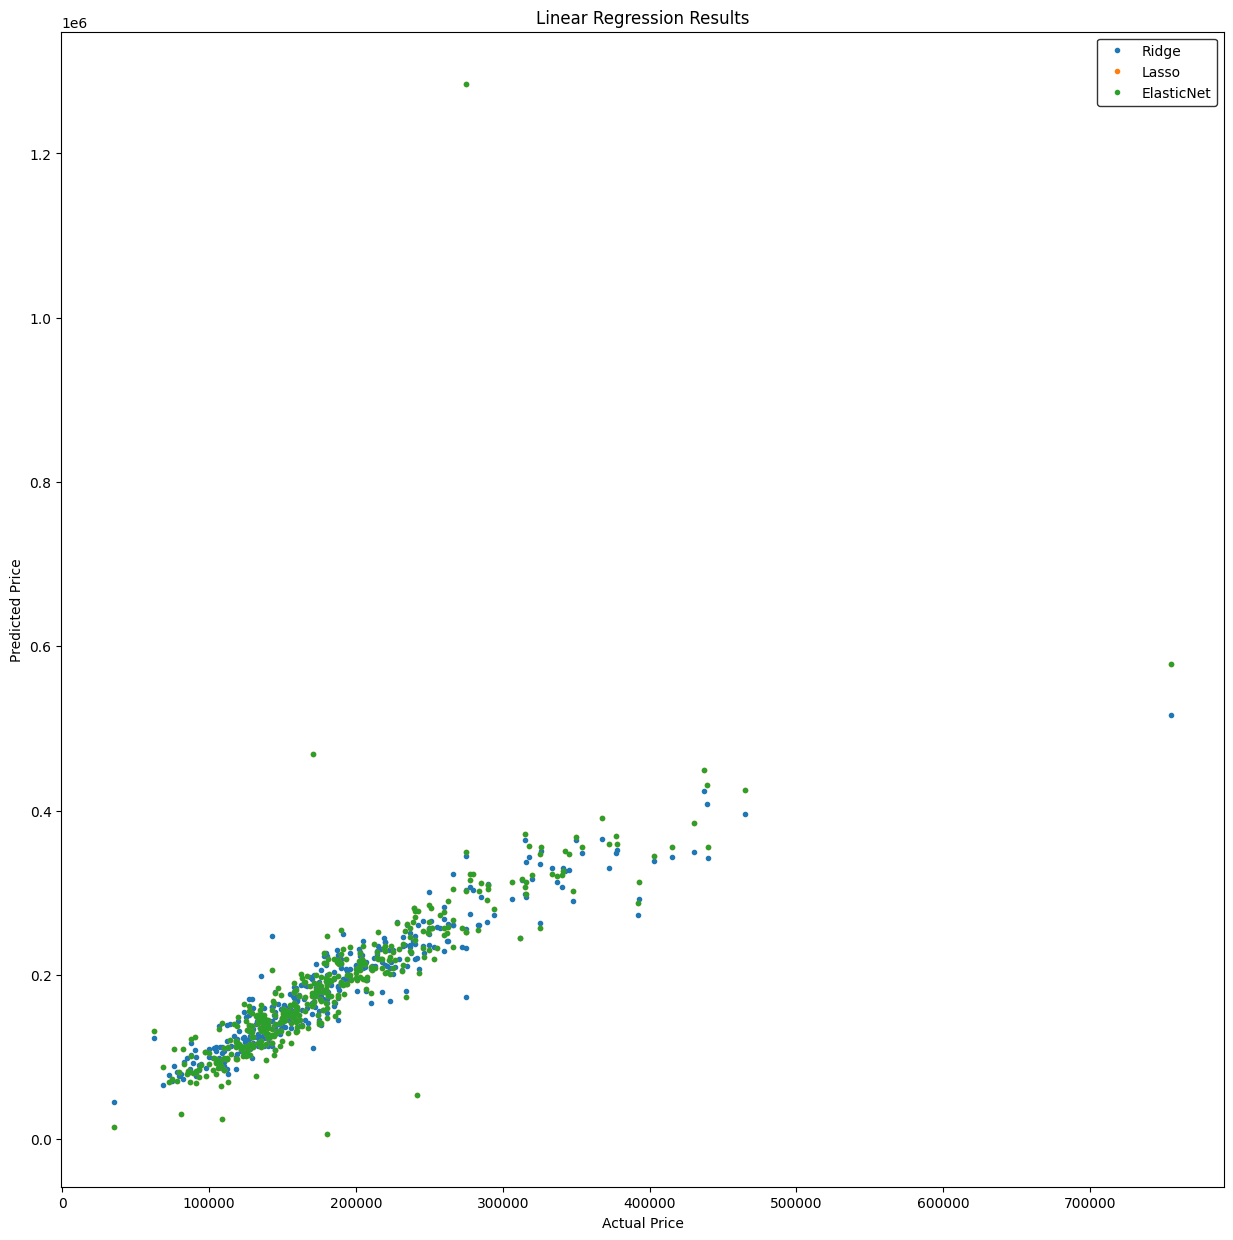

In [238]:
f = plt.figure(figsize=(15,15))
ax = plt.axes()

labels = ['Ridge', 'Lasso', 'ElasticNet']

models = [ridge_cv, lasso_cv, elastic_cv]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='Linear Regression Results');

## Question 8

Let's explore Stochastic gradient descent in this exercise.\
Recall that Linear models in general are sensitive to scaling.
However, SGD is *very* sensitive to scaling.\
Moreover, a high value of learning rate can cause the algorithm to diverge, whereas a too low value may take too long to converge.

*   Fit a stochastic gradient descent model without a regularization penalty (the relevant parameter is `penalty`).
*   Now fit stochastic gradient descent models with each of the three penalties (L2, L1, Elastic Net) using the parameter values determined by cross validation above.
*   Do not scale the data before fitting the model.
*   Compare the results to those obtained without using stochastic gradient descent.


In [245]:
from sklearn.linear_model import SGDRegressor


non_scaled  = pd.concat([numbers,categories_encoded], axis=1, join='inner')

X_non_scaled = non_scaled.drop("SalePrice",axis="columns")
y_non_scaled = non_scaled["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X_non_scaled,y_non_scaled,train_size=0.7)
sgd_no_penalty = SGDRegressor()



sgd_no_penalty.fit(X_train,y_train)

no_penalty_predictions = sgd_no_penalty.predict(X_test)

print(rmse(y_test,no_penalty_predictions))

3.386792658451259e+32


In [246]:
penalties = ["l2", "l1", "elasticnet"]
sgd_predictions = {}
sgd_predictions_scores = []
for penalty in penalties:
    sgd = SGDRegressor(penalty = penalty)
    sgd_predict = sgd.fit(X_train,y_train).predict(X_test)
    sgd_predictions[penalty]  = sgd_predict
    sgd_predictions_scores.append(rmse(y_test, sgd_predict))


In [247]:
sgd_predictions["l2"]

array([8.61958126e+16, 9.84774842e+15, 6.40363087e+16, 5.36684126e+16,
       6.52090527e+16, 8.80969606e+16, 4.40758949e+15, 6.99302728e+16,
       5.90297165e+16, 1.02246467e+17, 9.08077270e+16, 2.58730819e+16,
       1.49468513e+17, 1.24014610e+16, 8.40670275e+16, 1.01229622e+17,
       3.32285076e+16, 7.74054230e+16, 4.72522941e+16, 7.46379690e+16,
       1.64830186e+17, 1.69706488e+17, 1.24215406e+17, 9.38617377e+16,
       3.07058948e+16, 1.27591174e+16, 7.62553384e+16, 5.83707061e+16,
       7.47114891e+16, 4.68610614e+16, 2.04170009e+16, 2.91409551e+16,
       1.28371632e+17, 5.26466278e+16, 5.68554020e+16, 1.92314567e+16,
       5.60603231e+16, 4.61758908e+16, 7.62067735e+16, 7.68984003e+16,
       9.57452495e+16, 7.98624339e+16, 8.11064534e+16, 9.60931006e+16,
       6.17382675e+16, 6.84041029e+16, 8.21216606e+16, 5.74786540e+16,
       7.66761876e+16, 6.49459305e+16, 6.78273431e+16, 3.68294901e+16,
       1.25179298e+16, 8.28750453e+16, 3.49438378e+16, 7.14071807e+16,
      

In [248]:
results = pd.DataFrame({'Ridge':ridge_cv_predictions,'Lasso': lasso_cv_predictions, 'ElasticNet':elastic_cv_predictions, "SGD_No_Penalty": no_penalty_predictions,"SGD_L1": sgd_predictions["l1"],"SGD_L2": sgd_predictions["l2"], "SGD_ELASTIC": sgd_predictions["elasticnet"]} )


In [249]:
results.head()

,Ridge,Lasso,ElasticNet,SGD_No_Penalty,SGD_L1,SGD_L2,SGD_ELASTIC
0,104503.672077,24383.429248,24383.429248,-1.467040e+16,7.497832e+16,8.619581e+16,6.225213e+16
1,107931.630951,97472.024307,97472.024307,-2.185788e+16,4.517711e+16,9.847748e+15,-5.556408e+16
2,208804.155347,214478.761148,214478.761148,-1.071751e+16,7.851662e+16,6.403631e+16,4.411851e+16
3,206423.619922,198025.593360,198025.593360,-1.045698e+16,7.185751e+16,5.366841e+16,3.873392e+16
4,258261.782863,233002.208525,233002.208525,-1.908562e+16,7.245307e+16,6.520905e+16,5.911227e+16


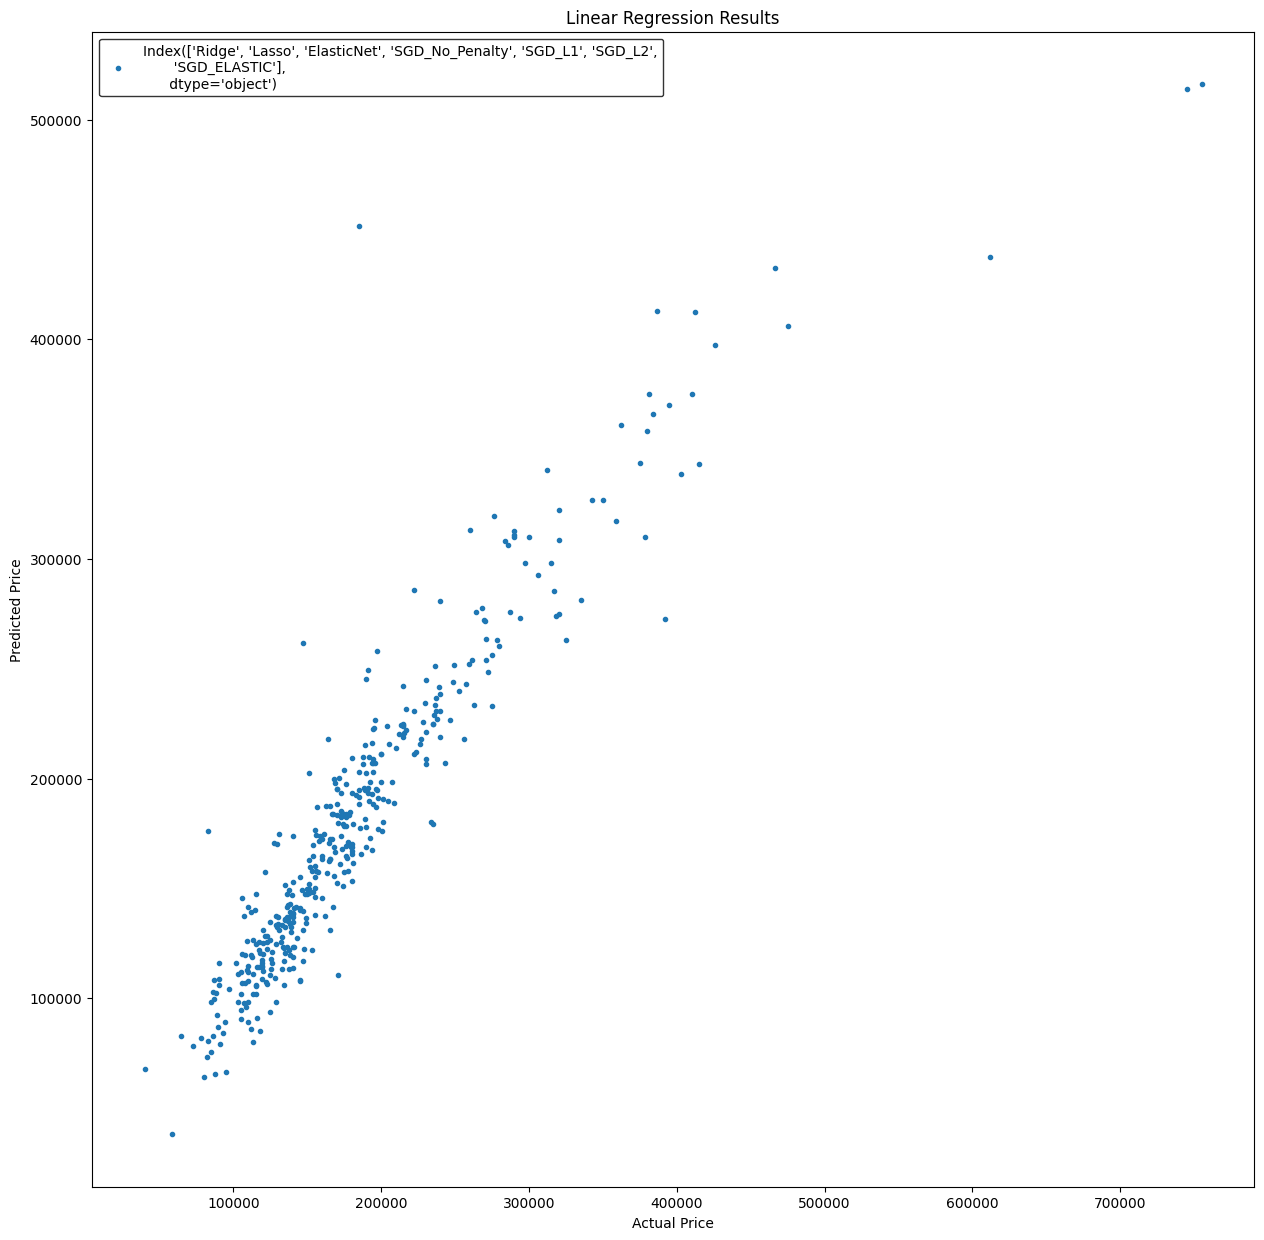

In [250]:
f = plt.figure(figsize=(15,15))
ax = plt.axes()

labels = [results.columns]

models = [ridge_cv, lasso_cv, elastic_cv,sgd_no_penalty,sgd_predictions.keys()]

for mod, lab in zip(models, labels):
    ax.plot(y_test, mod.predict(X_test),
             marker='o', ls='', ms=3.0, label=lab)


leg = plt.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.0)

ax.set(xlabel='Actual Price',
       ylabel='Predicted Price',
       title='Linear Regression Results');